In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
data = pd.DataFrame({
    'VAR1': np.random.exponential(scale=10, size=1000),
    'VAR2': np.random.uniform(0, 1, 1000),
    'VAR3': np.random.normal(50, 10, 1000),
    'VAR4': np.random.choice(['A', 'B', 'C', 'D'], size=1000),
    'independente': np.random.choice([0, 1], size=1000)
})

In [84]:
data.head()

,VAR1,VAR2,VAR3,VAR4,independente
0,6.783468,0.409588,30.014455,C,1
1,8.768898,0.685211,41.679740,B,0
2,19.177692,0.340845,55.775698,A,1
3,2.798980,0.892501,33.339077,C,1
4,12.001786,0.479274,35.383735,B,0


[]

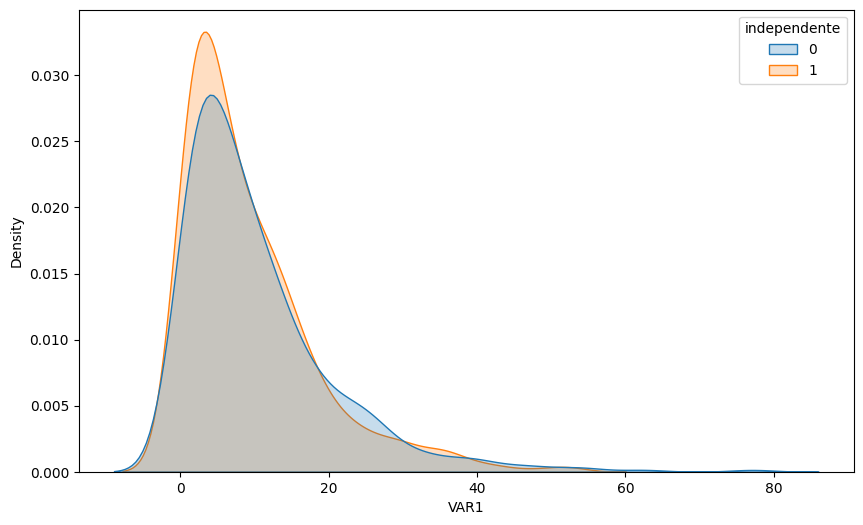

In [85]:
plt.figure(figsize=(10,6))


sns.kdeplot(data=data, x='VAR1', hue='independente', fill=True)

plt.plot()

In [86]:
data[data['VAR1'] < 0 ]

,VAR1,VAR2,VAR3,VAR4,independente


In [87]:
data['VAR1'], lambda_ = boxcox(data['VAR1'] + 1)

[]

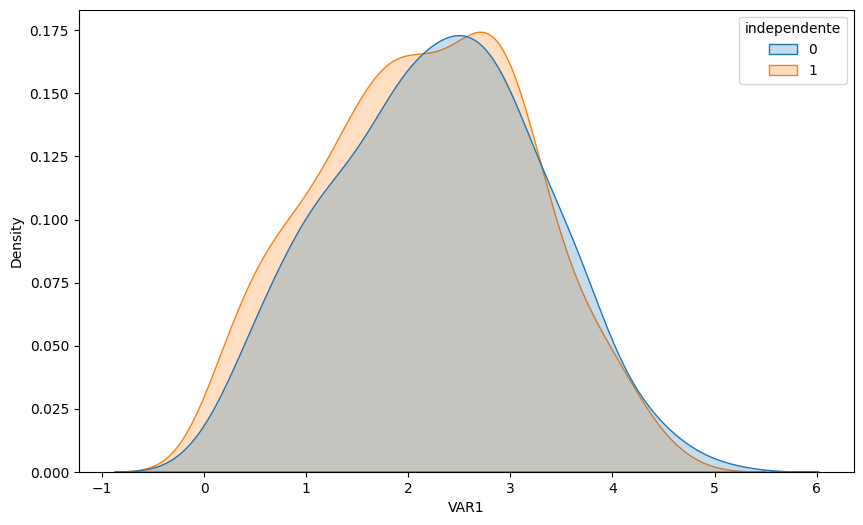

In [88]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=data, x='VAR1', hue='independente', fill=True)

plt.plot()

In [89]:
lambda_

0.07309693733103059

In [90]:
# Cria variáveis dummy para a variável categórica VAR4
data = pd.concat([data, pd.get_dummies(data['VAR4'], prefix='VAR4')], axis=1)
data = data.drop('VAR4', axis=1)

# Separa as variáveis independentes da variável dependente
X = data.drop('independente', axis=1)
y = data['independente']

In [91]:
data.head()

,VAR1,VAR2,VAR3,independente,VAR4_A,VAR4_B,VAR4_C,VAR4_D
0,2.213889,0.409588,30.014455,1,0,0,1,0
1,2.480062,0.685211,41.679740,0,0,1,0,0
2,3.360060,0.340845,55.775698,1,1,0,0,0
3,1.402014,0.892501,33.339077,1,0,0,1,0
4,2.821325,0.479274,35.383735,0,0,1,0,0


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [109]:
import numpy as np
from scipy import stats

amostra = [50000, 55000, 48000, 40000, 120000, 120100, 120000, 119000]

media_amostra = np.mean(amostra)
desvio_padrao_amostra = np.std(amostra)

print(media_amostra)

# Cálculo do valor t e valor p do teste
valor_t, valor_p = stats.ttest_1samp(amostra, 120000-40000)

print('P-value', valor_p)

nivel_significancia = 0.05

# Verificação da hipótese nula
if valor_p < nivel_significancia:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

84012.5
P-value 0.7764350047946199
Não rejeitamos a hipótese nula


In [196]:
df = pd.DataFrame({
    'ID': [1,2,3,4,5,6,7],
    'SLD_M_3': [0,0,93622,54521,14523,254120,540000],
    'SLD_M_2': [0,0,93000,54214,12000,250540,539000],
    'SLD_M_1': [29300,0,91150,53214,0,250000,538124],
    'SLD_M0': [29000,0,90200,52698,0,195123,540100],
    'SLD_M1': [28450,0,89652,51784,20145,194999,540110],
    'SLD_M2': [28000,0,129314,51222,20100,192650,540120],
    'SLD_M3': [23000,0,129000,50145,20000,189510,539910],
    'CLASS' : [1,0,1,0,1,0,0]
    })

In [131]:
# df['ARCTAN_M3_M_3'] = np.degrees(np.arctan((df['SLD_M3'] - df['SLD_M_3'])/7))
# df['ARCTAN_M0_M_3'] = np.degrees(np.arctan((df['SLD_M0'] - df['SLD_M_3'])/4))
# df['ARCTAN_M3_M0'] = np.degrees(np.arctan((df['SLD_M3'] - df['SLD_M0'])/4))

In [197]:
def calc_var_percentual(var1, var2):
    if (np.isnan(var1) or var1==0) and var2 > 0:
        return 1
    elif (np.isnan(var1) or var1 == 0) and (np.isnan(var2) or var2 == 0):
        return 0
    elif var2 == 0 or np.isnan(var2):
        return -1
    else:
        return (var2/var1)-1

In [198]:
def normalize_X(x, var):
    if (x['MAX_SALDO'] - x['MIN_SALDO']) == 0:
        return 0
    else:
         return (df[var] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])

In [199]:
df['VAR_M0_M_3'] =df.apply(lambda x: calc_var_percentual(x['SLD_M_3'], x['SLD_M0']),axis=1)
df['VAR_M3_M0'] =df.apply(lambda x: calc_var_percentual(x['SLD_M0'], x['SLD_M3']),axis=1)
df['VAR_M3_M_3'] =df.apply(lambda x: calc_var_percentual(x['SLD_M_3'], x['SLD_M3']),axis=1)

df['MAX_SALDO'] = df[['SLD_M_3', 'SLD_M_2', 'SLD_M_1', 'SLD_M0', 'SLD_M1', 'SLD_M2', 'SLD_M3']].max(axis=1)
df['MIN_SALDO'] = df[['SLD_M_3', 'SLD_M_2', 'SLD_M_1', 'SLD_M0', 'SLD_M1', 'SLD_M2', 'SLD_M3']].min(axis=1)

df['SLD_M_3_NORM'] = (df['SLD_M_3'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])
df['SLD_M_2_NORM'] = (df['SLD_M_2'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])
df['SLD_M_1_NORM'] = (df['SLD_M_1'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])
df['SLD_M0_NORM'] = (df['SLD_M0'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])
df['SLD_M1_NORM'] = (df['SLD_M1'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])
df['SLD_M2_NORM'] = (df['SLD_M2'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])
df['SLD_M3_NORM'] = (df['SLD_M3'] - df['MIN_SALDO']) / (df['MAX_SALDO'] - df['MIN_SALDO'])

df['ARCTAN_M3_M_3'] = np.degrees(np.arctan((df['SLD_M3_NORM'] - df['SLD_M_3_NORM'])/7))
df['ARCTAN_M0_M_3'] = np.degrees(np.arctan((df['SLD_M0_NORM'] - df['SLD_M_3_NORM'])/4))
df['ARCTAN_M3_M0'] = np.degrees(np.arctan((df['SLD_M3_NORM'] - df['SLD_M0_NORM'])/4))

In [201]:
df[['ID', 'SLD_M_3', 'SLD_M_2', 'SLD_M_1', 'SLD_M0', 'SLD_M1', 'SLD_M2',
       'SLD_M3', 'VAR_M0_M_3', 'VAR_M3_M0', 'VAR_M3_M_3',  'ARCTAN_M0_M_3', 'ARCTAN_M3_M0', 'ARCTAN_M3_M_3', 'CLASS']]

,ID,SLD_M_3,SLD_M_2,SLD_M_1,SLD_M0,SLD_M1,SLD_M2,SLD_M3,VAR_M0_M_3,VAR_M3_M0,VAR_M3_M_3,ARCTAN_M0_M_3,ARCTAN_M3_M0,ARCTAN_M3_M_3,CLASS
0,1,0,0,29300,29000,28450,28000,23000,1.000000,-0.206897,1.000000,13.898126,-2.930673,6.398441,1
1,2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,0
2,3,93622,93000,91150,90200,89652,129314,129000,-0.036551,0.430155,0.377881,-1.235665,13.742872,7.261879,1
3,4,54521,54214,53214,52698,51784,51222,50145,-0.033437,-0.048446,-0.080263,-5.945784,-8.298213,-8.130102,0
4,5,14523,12000,0,0,20145,20100,20000,-1.000000,1.000000,0.377126,-10.216784,13.939166,2.224241,1
5,6,254120,250540,250000,195123,194999,192650,189510,-0.232162,-0.028766,-0.254250,-12.859199,-1.244198,-8.130102,0
6,7,540000,539000,538124,540100,540110,540120,539910,0.000185,-0.000352,-0.000167,0.717595,-1.363244,-0.369063,0


In [135]:
np.degrees(np.arctan((50-30)/7))

70.70995378081128